### Explore the data

In [1]:
import pandas as pd
measurements2 = pd.read_csv('data/measurements.csv')
measurements2.head(5)

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28,5,26,"21,5",12,NaN,E10,0,0,0,45,E10
1,12,"4,2",30,"21,5",13,NaN,E10,0,0,0,NaN,NaN
2,"11,2","5,5",38,"21,5",15,NaN,E10,0,0,0,NaN,NaN
3,"12,9","3,9",36,"21,5",14,NaN,E10,0,0,0,NaN,NaN
4,"18,5","4,5",46,"21,5",15,NaN,E10,0,0,0,NaN,NaN


In [2]:
measurements2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   distance       388 non-null    object
 1   consume        388 non-null    object
 2   speed          388 non-null    int64 
 3   temp_inside    376 non-null    object
 4   temp_outside   388 non-null    int64 
 5   specials       93 non-null     object
 6   gas_type       388 non-null    object
 7   AC             388 non-null    int64 
 8   rain           388 non-null    int64 
 9   sun            388 non-null    int64 
 10  refill liters  13 non-null     object
 11  refill gas     13 non-null     object
dtypes: int64(5), object(7)
memory usage: 36.5+ KB


In [3]:
measurements = pd.read_excel('data/measurements2.xlsx')
measurements.head()

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28.0,5.0,26,21.5,12,NaN,E10,0,0,0,45.0,E10
1,12.0,4.2,30,21.5,13,NaN,E10,0,0,0,NaN,NaN
2,11.2,5.5,38,21.5,15,NaN,E10,0,0,0,NaN,NaN
3,12.9,3.9,36,21.5,14,NaN,E10,0,0,0,NaN,NaN
4,18.5,4.5,46,21.5,15,NaN,E10,0,0,0,NaN,NaN


In [4]:
measurements.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   distance       388 non-null    float64
 1   consume        388 non-null    float64
 2   speed          388 non-null    int64  
 3   temp_inside    376 non-null    float64
 4   temp_outside   388 non-null    int64  
 5   specials       93 non-null     object 
 6   gas_type       388 non-null    object 
 7   AC             388 non-null    int64  
 8   rain           388 non-null    int64  
 9   sun            388 non-null    int64  
 10  refill liters  13 non-null     float64
 11  refill gas     13 non-null     object 
dtypes: float64(4), int64(5), object(3)
memory usage: 36.5+ KB


### Cleaning the data

In [5]:
cols = []
for col in measurements.columns:
    cols.append(col.replace(' ', '_'))
measurements.columns = cols

In [6]:
def print_unique_values(df):
    for col in df.columns:
        print(f'{col}:{df[col].unique()}')

In [7]:
measurements.rename(columns={'AC':'ac'}, inplace=True)

In [8]:
print_unique_values(measurements)

distance:[ 28.   12.   11.2  12.9  18.5   8.3   7.8  12.3   4.9  11.9  12.4  11.8
  24.7  17.3  33.4  25.9  25.3  14.2  17.9  18.4  18.3  32.6  19.   12.1
  20.    4.5  11.7  10.2   5.4   2.   16.   27.3  10.6  11.6  13.1   6.1
 153.5   2.9   2.1   9.8   6.8  14.   13.9   9.7  24.8  34.8   5.2  10.5
  13.2  13.   12.2  12.5  15.7   6.4   5.3  26.2  18.8  22.9 162.7  16.6
  15.9   5.1  22.4  31.1  16.1   4.2  17.4  23.5   7.   20.1  20.8   1.7
  35.9  36.9  16.8   9.9  36.6  44.9  21.6  39.4  26.6  53.2  18.9  43.5
  16.4  21.1  22.7  44.4  35.8  40.6  14.1  58.7  16.2  31.8  51.6  38.6
  81.2 130.3  67.2  43.7  56.1  39.   38.5  28.2  19.6  22.2  13.6  12.6
   8.7   7.9   2.4  18.1   1.3  13.4  12.8  29.   31.4  27.1  25.2  14.3
  16.9   9.2  31.5  24.9  17.    7.4  25.7  24.5   4.1  15.4 101.9  93.9
  32.1  48.6  37.2  28.8   6.7   6.6  13.3  12.7  16.5  20.6  16.3  18.7
  36.5  29.9  10.1  31.9  10.8  19.8  11.3  11.5  21.4  32.   41.9 211.
 216.1  25.5  22.1  39.5  21.5   4.8 100.9 

In [9]:
measurements.isnull().sum()/len(measurements)

distance         0.000000
consume          0.000000
speed            0.000000
temp_inside      0.030928
temp_outside     0.000000
specials         0.760309
gas_type         0.000000
ac               0.000000
rain             0.000000
sun              0.000000
refill_liters    0.966495
refill_gas       0.966495
dtype: float64

In [10]:
measurements['refill_liters'].fillna(0, inplace=True)

In [11]:
measurements['specials'] = measurements['specials'].str.strip().str.lower()
measurements['specials'].fillna('unknown', inplace=True)
measurements['specials'].replace({'sun ac':'ac sun'}, inplace=True)

In [12]:
measurements['temp_inside'].fillna(0, inplace=True)

In [13]:
measurements['refill_gas'].fillna(0, inplace=True)

In [14]:
measurements.isnull().sum()/len(measurements)

distance         0.0
consume          0.0
speed            0.0
temp_inside      0.0
temp_outside     0.0
specials         0.0
gas_type         0.0
ac               0.0
rain             0.0
sun              0.0
refill_liters    0.0
refill_gas       0.0
dtype: float64

In [15]:
measurements.head()

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,ac,rain,sun,refill_liters,refill_gas
0,28.0,5.0,26,21.5,12,unknown,E10,0,0,0,45.0,E10
1,12.0,4.2,30,21.5,13,unknown,E10,0,0,0,0.0,0
2,11.2,5.5,38,21.5,15,unknown,E10,0,0,0,0.0,0
3,12.9,3.9,36,21.5,14,unknown,E10,0,0,0,0.0,0
4,18.5,4.5,46,21.5,15,unknown,E10,0,0,0,0.0,0


In [16]:
measurements.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   distance       388 non-null    float64
 1   consume        388 non-null    float64
 2   speed          388 non-null    int64  
 3   temp_inside    388 non-null    float64
 4   temp_outside   388 non-null    int64  
 5   specials       388 non-null    object 
 6   gas_type       388 non-null    object 
 7   ac             388 non-null    int64  
 8   rain           388 non-null    int64  
 9   sun            388 non-null    int64  
 10  refill_liters  388 non-null    float64
 11  refill_gas     388 non-null    object 
dtypes: float64(4), int64(5), object(3)
memory usage: 36.5+ KB


In [17]:
def convert_to_float(df):
    float_cols = [col for col in df.columns if col not in ['specials', 'gas_type', 'refill_gas']]
    df[float_cols] = df[float_cols].astype('float64')
    
    return df

In [18]:
measurements = convert_to_float(measurements) 

In [19]:
measurements.to_csv('measurements_cleaned_data.csv')

### Visualization

In [20]:
import matplotlib.pyplot as plt

def plot_data(df):
    # Scatter plot: distance vs. consume
    plt.scatter(df['distance'], df['consume'])
    plt.xlabel('Distance')
    plt.ylabel('Consumption')
    plt.title('Distance vs. Consumption')
    plt.show()

    # Box plot: gas_type vs. consume
    df.boxplot(column=['consume'], by='gas_type')
    plt.xlabel('Gas Type')
    plt.ylabel('Consumption')
    plt.title('Gas Type vs. Consumption')
    plt.show()

    # Histogram: speed distribution
    plt.hist(df['speed'], bins=20)
    plt.xlabel('Speed')
    plt.ylabel('Frequency')
    plt.title('Speed Distribution')
    plt.show()


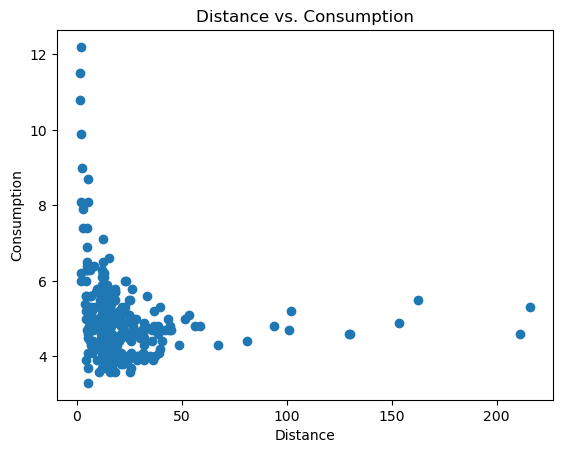

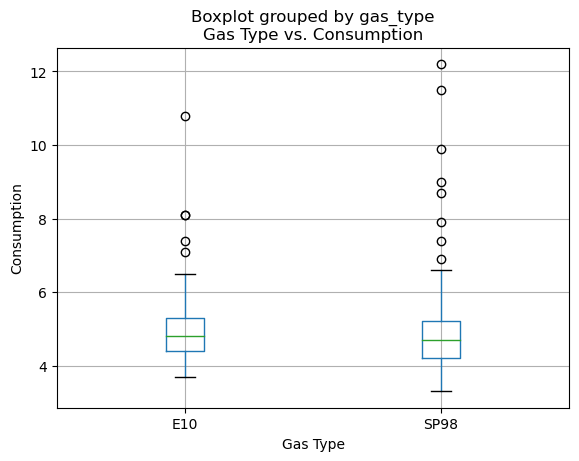

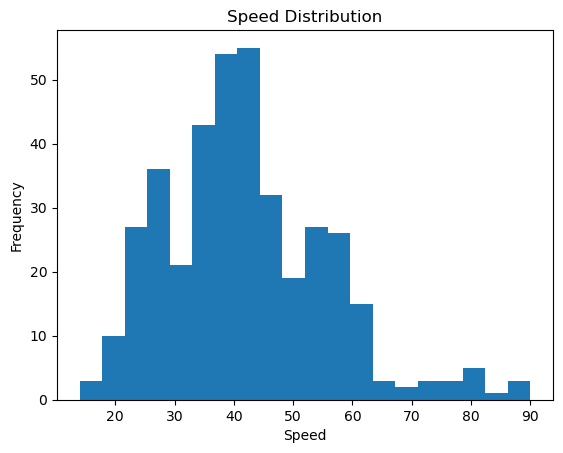

In [21]:
plot_data(measurements)


### Using Random Forest Regression predict the consumption depending on the gas type


### Random Forest Regression

In [22]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# create a binary variable for gas type
measurements['E10_gas'] = (measurements['gas_type'] == 'E10').astype(int)

# define the independent and dependent variables
X = measurements[['E10_gas', 'speed', 'temp_inside', 'temp_outside', 'ac', 'rain', 'sun']]
y = measurements['consume']

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# fit a random forest regression model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# make predictions on the test set
y_pred = model.predict(X_test)

# calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)

print("Random Forest Regression Results:")
print("Mean Squared Error: ", mse)
print("Consumption difference with E10 gas: ", model.feature_importances_[0])


Random Forest Regression Results:
Mean Squared Error:  1.1016680355128214
Consumption difference with E10 gas:  0.027154956686205475


#### Conlucion: 
Based on the Random Forest Regression model, the mean squared error is 1.1016680355128214, which indicates that the model is not very accurate in predicting fuel consumption. The consumption difference with E10 gas is 0.027154956686205475, which means that on average, the car consumes 0.027 liters more fuel per kilometer when using E10 gas compared to SP98 gas.